In [ ]:
%matplotlib inline


Extracting signals of a probabilistic atlas of rest functional regions
========================================================================

This example extracts the signal on regions defined via a probabilistic
atlas, to construct a functional connectome.

We use the `MSDL atlas
<https://team.inria.fr/parietal/18-2/spatial_patterns/spatial-patterns-in-resting-state/>`_
of functional regions in rest.

The key to extract signals is to use the
:class:`nilearn.input_data.NiftiMapsMasker` that can transform nifti
objects to time series using a probabilistic atlas.

As the MSDL atlas comes with (x, y, z) MNI coordinates for the different
regions, we can visualize the matrix as a graph of interaction in a
brain. To avoid having too dense a graph, we represent only the 20% edges
with the highest values.




Retrieve the atlas and the data
--------------------------------



In [1]:
from nilearn import datasets
atlas = datasets.fetch_atlas_msdl()
# Loading atlas image stored in 'maps'
atlas_filename = atlas['maps']
# Loading atlas data stored in 'labels'
labels = atlas['labels']

# Load the functional datasets
data = datasets.fetch_adhd(n_subjects=1)

print('First subject resting-state nifti image (4D) is located at: %s' %
      data.func[0])


Dataset created in /home/uga_qinglin/nilearn_data/msdl_atlas



Downloaded 106496 of 209734 bytes (50.8%,    1.1s remaining)

First subject resting-state nifti image (4D) is located at: /home/uga_qinglin/nilearn_data/adhd/data/0010042/0010042_rest_tshift_RPI_voreg_mni.nii.gz


Downloaded 209734 of 209734 bytes (100.0%,    0.0s remaining) ...done. (2 seconds, 0 min)
Extracting data from /home/uga_qinglin/nilearn_data/msdl_atlas/a28b0b24f45bf2f10e3b9d334ecbdf1a/MSDL_rois.zip..... done.
/usr/local/lib/python2.7/dist-packages/numpy/lib/npyio.py:2278: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  output = genfromtxt(fname, **kwargs)
/home/uga_qinglin/Documents/nilearn-deep/nilearn/datasets/func.py:502: VisibleDeprecationWarning: Reading unicode strings without specifying the encoding argument is deprecated. Set the encoding, use None for the system default.
  dtype=None)


Extract the time series
------------------------



In [2]:
from nilearn.input_data import NiftiMapsMasker
masker = NiftiMapsMasker(maps_img=atlas_filename, standardize=True,
                         memory='nilearn_cache', verbose=5)

time_series = masker.fit_transform(data.func[0],
                                   confounds=data.confounds)

[NiftiMapsMasker.fit_transform] loading regions from /home/uga_qinglin/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii
Resampling maps
________________________________________________________________________________
[Memory] Calling nilearn.image.resampling.resample_img...
resample_img(<nibabel.nifti1.Nifti1Image object at 0x7f3914254c50>, target_shape=(61, 73, 61), target_affine=array([[  -3.,   -0.,   -0.,   90.],
       [  -0.,    3.,   -0., -126.],
       [   0.,    0.,    3.,  -72.],
       [   0.,    0.,    0.,    1.]]), interpolation='continuous')


/home/uga_qinglin/Documents/nilearn-deep/nilearn/_utils/cache_mixin.py:291: UserWarning: memory_level is currently set to 0 but a Memory object has been provided. Setting memory_level to 1.
  warnings.warn("memory_level is currently set to 0 but "


_____________________________________________________resample_img - 2.1s, 0.0min
________________________________________________________________________________
[Memory] Calling nilearn.input_data.base_masker.filter_and_extract...
filter_and_extract('/home/uga_qinglin/nilearn_data/adhd/data/0010042/0010042_rest_tshift_RPI_voreg_mni.nii.gz', 
{ 'allow_overlap': True,
  'detrend': False,
  'high_pass': None,
  'low_pass': None,
  'maps_img': '/home/uga_qinglin/nilearn_data/msdl_atlas/MSDL_rois/msdl_rois.nii',
  'mask_img': None,
  'smoothing_fwhm': None,
  'standardize': True,
  't_r': None,
  'target_affine': None,
  'target_shape': None}, confounds=['/home/uga_qinglin/nilearn_data/adhd/data/0010042/0010042_regressors.csv'], memory_level=1, verbose=5, memory=Memory(location=nilearn_cache/joblib))
[NiftiMapsMasker.transform_single_imgs] Loading data from /home/uga_qinglin/nilearn_data/adhd/data/0010042/0010042_rest_tshift_RPI_voreg_mni.nii.gz
[NiftiMapsMasker.transform_single_imgs] Extr

`time_series` is now a 2D matrix, of shape (number of time points x
number of regions)



In [3]:
print(time_series.shape)

(176, 39)


Build and display a correlation matrix
---------------------------------------



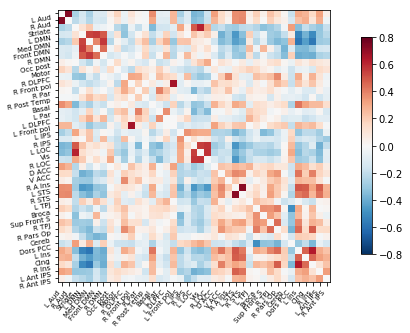

In [6]:
from nilearn.connectome import ConnectivityMeasure
correlation_measure = ConnectivityMeasure(kind='correlation')
correlation_matrix = correlation_measure.fit_transform([time_series])[0]

# Display the correlation matrix
import numpy as np
from nilearn import plotting
# Mask out the major diagonal
np.fill_diagonal(correlation_matrix, 0)
plotting.plot_matrix(correlation_matrix, labels=labels, colorbar=True,
                     vmax=0.8, vmin=-0.8)


And now display the corresponding graph
----------------------------------------



/usr/local/lib/python2.7/dist-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


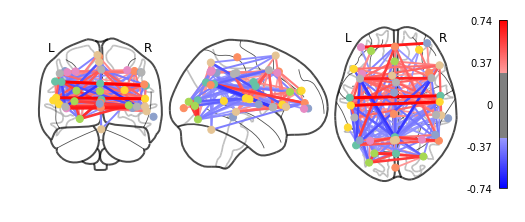

In [7]:
from nilearn import plotting
coords = atlas.region_coords

# We threshold to keep only the 20% of edges with the highest value
# because the graph is very dense
plotting.plot_connectome(correlation_matrix, coords,
                         edge_threshold="80%", colorbar=True)

plotting.show()

3D visualization in a web browser
---------------------------------
An alternative to :func:`nilearn.plotting.plot_connectome` is to use
:func:`nilearn.plotting.view_connectome` that gives more interactive
visualizations in a web browser. See `interactive-connectome-plotting`
for more details.



In [11]:
view = plotting.view_connectome(correlation_matrix, coords, threshold='80%')

# uncomment this to open the plot in a web browser:
view.open_in_browser()

AttributeError: 'module' object has no attribute 'view_connectome'

In a Jupyter notebook, if ``view`` is the output of a cell, it will
be displayed below the cell



In [10]:
view

NameError: name 'view' is not defined